 # Bike Sharing Linear Regression

<b>Problem Statement</b>

    Build a multiple linear regression model for the prediction of demand for shared bikes.A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 

    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits


<b>Business Goal:</b>

    Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market



<b>Steps involved in Multiple Linear Regression <b>

 1. Read the data from the source 
 2. Understand The data 
 3. Clean up the data, drop unwanted columns, check for duplicates etc
 4. EDA
 5. Map all categorical variables to Dummy variables
 6. Train and test split 
 7. Scaling 
 8. Feature Selection 
 9. Evaluate Test set 

In [179]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


## Read the data from the source

In [180]:
# Reading The data 

bike_data = pd.read_csv('day.csv')
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Understand The data

In [181]:
# to find the number rows and columns
bike_data.shape

(730, 16)

In [182]:
#check if there are missing values or null values 
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the info() data, we can conclude that all the columns have 730 rows and no value is missing in the rows hence no missing value handling is required. From the problem statement we conclude count as the target variable(dependent variable)

## Visualise numerical Data 


In [184]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


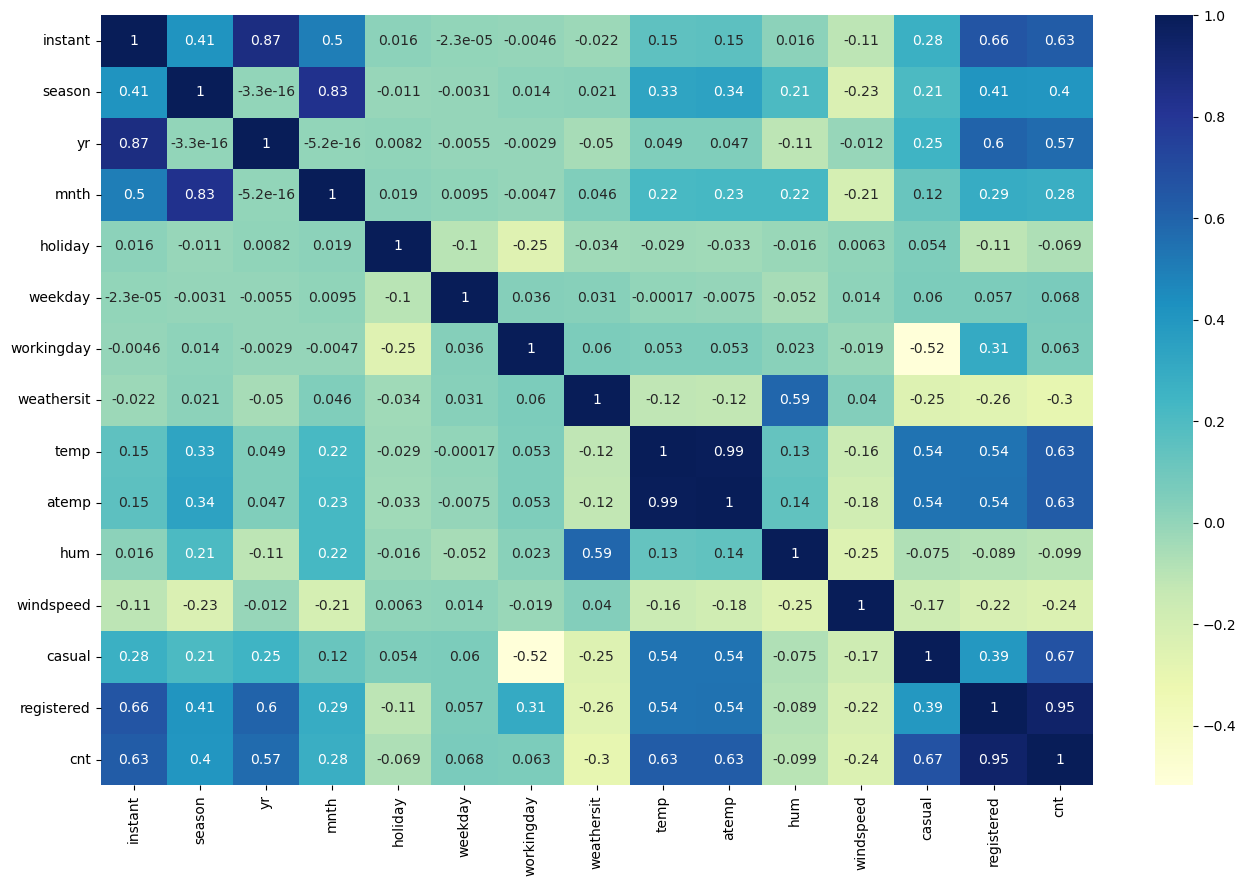

In [185]:
plt.figure(figsize=(16,10))
sns.heatmap(bike_data.corr(),cmap='YlGnBu',annot=True)
plt.show()

## Clean up the data, drop unwanted columns, check for duplicates etc

In [186]:
#drop all the columns considered as not value add from the heatmap using corr
data = bike_data.drop(['instant','dteday','casual','registered'],axis=1)

In [187]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [188]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


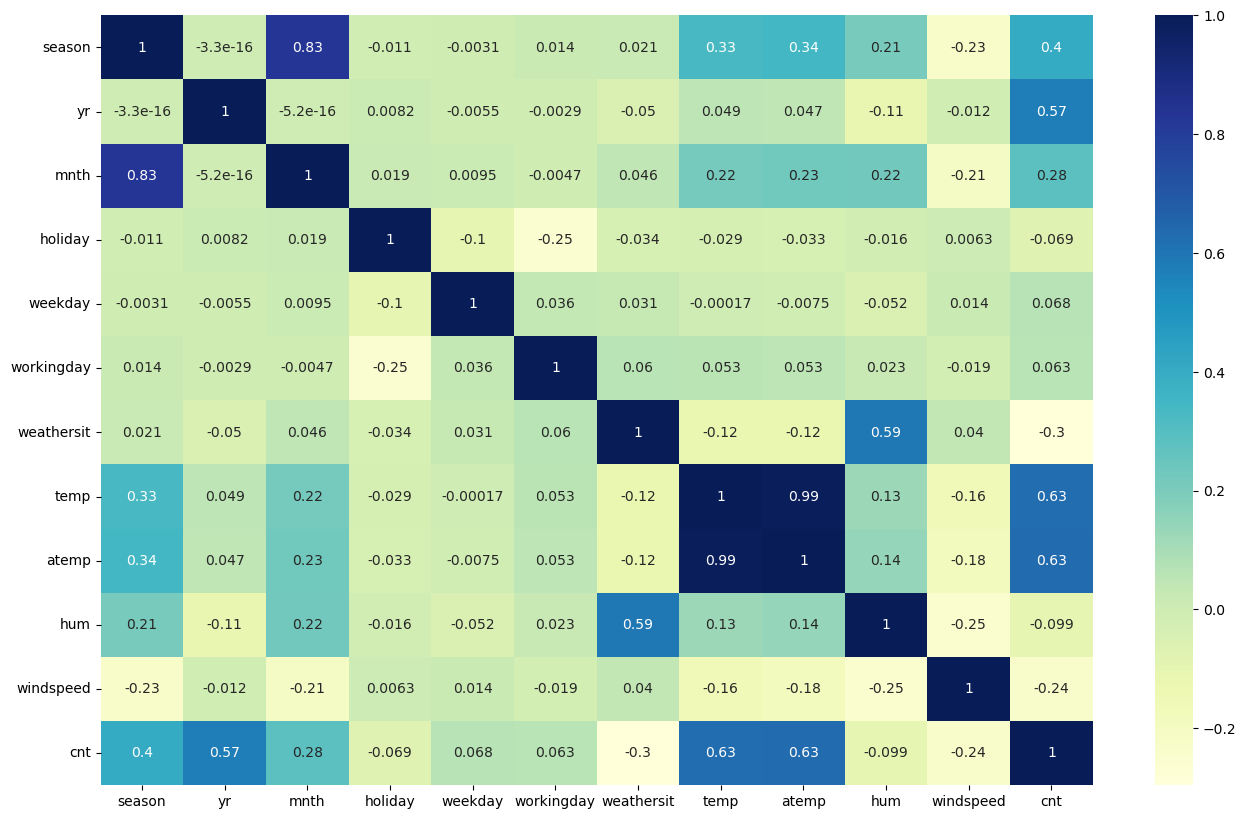

In [189]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

### Map all categorical variables to Dummy variables

  Categorical variables required special attention, they need to recorded as series of variables which can then be entered into regression model. we would create k-1 variables, where k is number of levels of the categorical variables
  
   In the provided data, we have identified season,year,month,holiday, weekday, workingday and weathersit as the categorical variables. Reason being the values of these variables in a range 

In [190]:
categorical_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
data[categorical_columns].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000


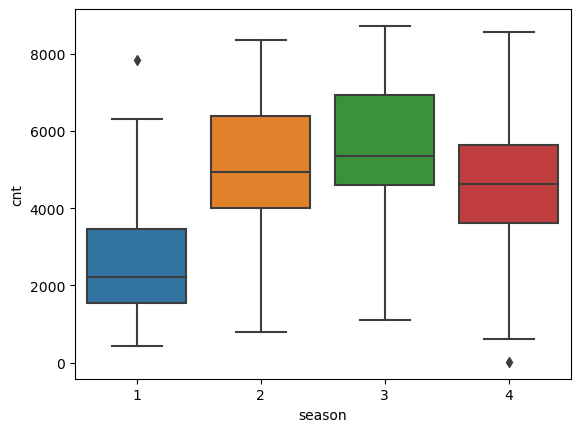

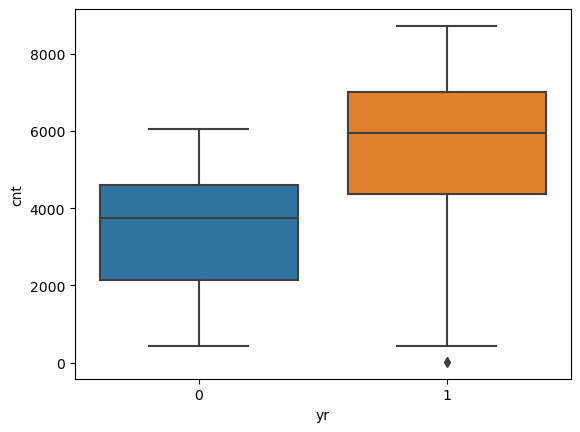

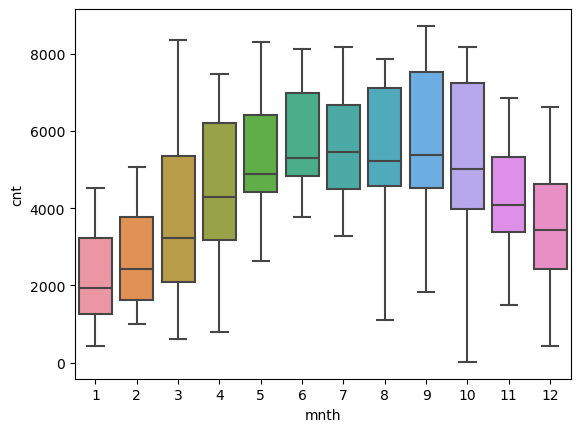

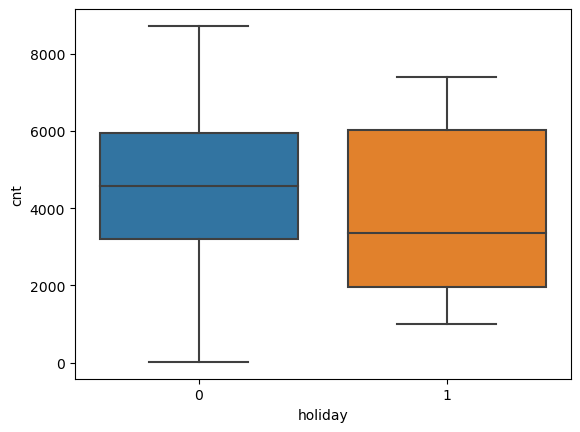

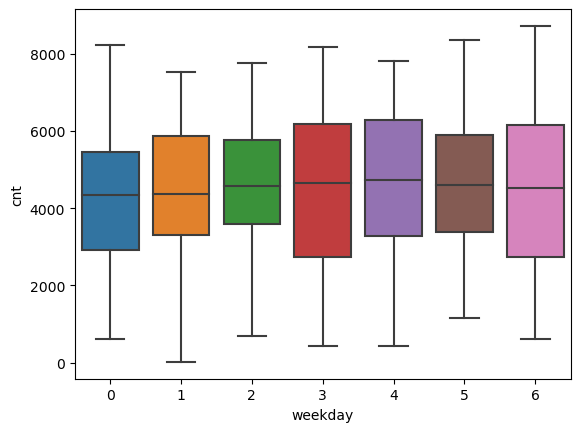

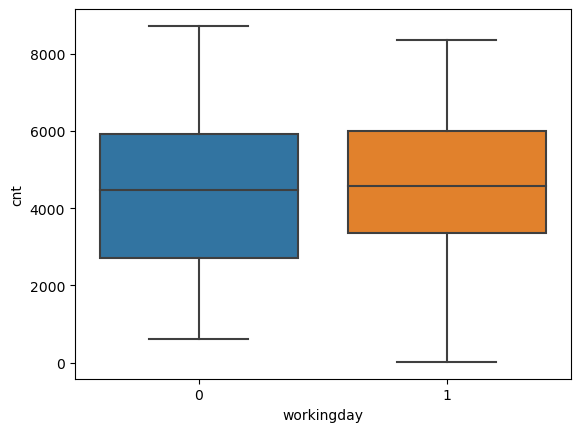

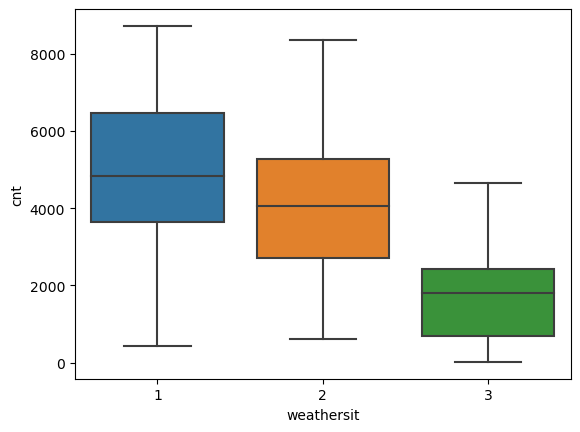

[None, None, None, None, None, None, None]

In [191]:
#create box plot to see outliers
def plot_boxplot(x_val,y_val):
    sns.boxplot(x=x_val,y=y_val,data=data)
    plt.show()


[plot_boxplot(each_x,'cnt') for each_x in categorical_columns]
    

In [192]:


categorical_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
data[categorical_columns].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000


From the list of categorical columns yr,holiday,workingday  already have k-1 columns.
Hence we create dummy variables for 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week (1:6)
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

To create dummy variables we need to convert the numerical values to corresponding string values

In [193]:
data['season'] = data['season'].apply(lambda x: {1:'spring', 2:'summer', 3:'fall', 4:'winter'}.get(x))

data['mnth'] = data['mnth'].apply(lambda x: {1:'Jan', 2:'Feb', 3:'March', 4:'April'
                                             ,5:'May', 6:'June', 7:'July', 8:'Aug'
                                            ,9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}.get(x))

data['weekday'] = data['weekday'].apply(lambda x: {0:'Sun',1:'Mon', 2:'Tues', 3:'Wed', 4:'Thur', 5:'Fri',6:'Sat'}.get(x))

data['weathersit'] = data['weathersit'].apply(lambda x: {1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}.get(x))


data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [194]:
season_dummy = pd.get_dummies(data['season'],drop_first=True)

In [195]:
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [196]:
mnth_dummy = pd.get_dummies(data['mnth'],drop_first=True)
weekday_dummy = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_dummy = pd.get_dummies(data['weathersit'],drop_first=True)

print(mnth_dummy.head())
print(weekday_dummy.head())
print(weathersit_dummy.head())


   Aug  Dec  Feb  Jan  July  June  March  May  Nov  Oct  Sep
0    0    0    0    1     0     0      0    0    0    0    0
1    0    0    0    1     0     0      0    0    0    0    0
2    0    0    0    1     0     0      0    0    0    0    0
3    0    0    0    1     0     0      0    0    0    0    0
4    0    0    0    1     0     0      0    0    0    0    0
   Mon  Sat  Sun  Thur  Tues  Wed
0    0    1    0     0     0    0
1    0    0    1     0     0    0
2    1    0    0     0     0    0
3    0    0    0     0     1    0
4    0    0    0     0     0    1
   Light Snow  Mist
0           0     1
1           0     1
2           0     0
3           0     0
4           0     0


In [197]:
data.shape

(730, 12)

In [198]:
#Adding dummy variables 
dummy_Columns = ['season','mnth','weekday','weathersit']
final_data =  pd.concat([data,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy],axis=1)
final_data.shape

(730, 34)

In [199]:
final_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tues', 'Wed',
       'Light Snow', 'Mist'],
      dtype='object')

In [200]:
#drop the original dummy columns 

final_data = final_data.drop(dummy_Columns,axis=1)
print(final_data.shape)
print(final_data.columns)

(730, 30)
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'March', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun',
       'Thur', 'Tues', 'Wed', 'Light Snow', 'Mist'],
      dtype='object')


<b>Train and test split</b>

In [201]:
df_train, df_test = train_test_split(final_data,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
df_train.head()

(510, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Light Snow,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


<b> Scaling</b>

 After applying scaling one can notice the large values in the column are reduced in the range of 0-1

In [202]:
#create scaling for numerical_columns
numerical_cols = ['temp','atemp','hum','windspeed','cnt']

scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [203]:
df_train[numerical_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
#creating X and Y sets 


y_train = df_train.pop('cnt')
X_train = df_train

Regression Model building with RFE 

In [205]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=18)
rfe = rfe.fit(X_train,y_train)


In [206]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 2),
 ('March', False, 6),
 ('May', False, 12),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 11),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thur', False, 9),
 ('Tues', False, 5),
 ('Wed', False, 7),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [207]:
support_var = X_train.columns[rfe.support_] ## variables suggested by RFE
support_var

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Feb', 'Jan', 'July', 'Nov', 'Sep', 'Sat',
       'Light Snow', 'Mist'],
      dtype='object')

In [208]:
non_support_var = X_train.columns[~rfe.support_]
non_support_var

Index(['atemp', 'Aug', 'June', 'March', 'May', 'Oct', 'Mon', 'Sun', 'Thur',
       'Tues', 'Wed'],
      dtype='object')

Calculating Variance Inflation factor

In [209]:
vif = pd.DataFrame()
vif['features']=support_var
vif['VIF'] = [ variance_inflation_factor(X_train[support_var].values,i) for i in range(X_train[support_var].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
4,hum,31.76
3,temp,19.75
6,spring,5.61
2,workingday,5.38
5,windspeed,4.79
8,winter,4.12
7,summer,2.88
11,Jan,2.40
17,Mist,2.33
0,yr,2.10


In [210]:
X_train_rfe = X_train[support_var]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          3.55e-190
Time:                        20:10:57   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.630      0.000       0.213       0.361
yr             0.2311      0.008     29.082      0.000       0.215       0.247
holiday       -0.0499      0.027     -1.857      0.064      -0.103       0.003
workingday     0.0443      0.011      3.878      0.000       0.022       0.067
temp           0.4598      0.038     12.233      0.000       0.386       0.534
hum           -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed     -0.1887      0.025     -7.440      0.000      -0.239      -0.139
spring        -0.0518      0.022     -2.390      0.017      -0.094      -0.009
summer         0.0377      0.015      2.483      0.013       0.008       0.068
winter         0.1035      0.018      5.852      0.000       0.069       0.138
Dec           -0.0491      0.018     -2.727      0.007      -0.085      -0.014
Feb           -0.0339      0.021     -1.591      0.112      -0.076       0.008
Jan           -0.0640      0.021     -3.025      0.003      -0.106      -0.022
July          -0.0517      0.018     -2.883      0.004      -0.087      -0.016
Nov           -0.0465      0.019     -2.499      0.013      -0.083      -0.010
Sep            0.0718      0.017      4.319      0.000       0.039       0.104
Sat            0.0542      0.014      3.761      0.000       0.026       0.083
Light Snow    -0.2583      0.026     -9.924      0.000      -0.309      -0.207
Mist          -0.0600      0.010     -5.813      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We want VIF < 5 
We could drop 
        - 1: High Pvalue, high vif 
        - 2: High low  high p value and low vif or high vif and low p value 

In [211]:
vif

,features,VIF
4,hum,31.76
3,temp,19.75
6,spring,5.61
2,workingday,5.38
5,windspeed,4.79
8,winter,4.12
7,summer,2.88
11,Jan,2.40
17,Mist,2.33
0,yr,2.10


In [212]:
#dropping hum 
def calculate_summary(X_train_rfe,y_train):
    X_train_sm = sm.add_constant(X_train_rfe)
    lr = sm.OLS(y_train,X_train_sm)
    lr_model = lr.fit()
    print(lr_model.summary())
    return lr_model


X_train_rfe_2 = X_train_rfe.drop('hum',axis=1)
x_train_model_2 = X_train_rfe_2 
lr_model=calculate_summary(X_train_rfe_2,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          4.80e-188
Time:                        20:10:57   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2187      0.034      6.474      0.0

In [213]:
def cal_vif(X_train,support_var):
    vif = pd.DataFrame()
    vif['features']=support_var
    vif['VIF'] = [ variance_inflation_factor(X_train[support_var].values,i) for i in range(X_train[support_var].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    print(vif)

In [214]:
cal_vif(x_train_model_2,x_train_model_2.columns)

      features   VIF
3         temp  7.30
2   workingday  5.35
4    windspeed  4.73
5       spring  4.55
7       winter  3.07
6       summer  2.33
10         Jan  2.24
0           yr  2.08
14         Sat  1.99
9          Feb  1.89
12         Nov  1.83
11        July  1.60
8          Dec  1.58
16        Mist  1.58
13         Sep  1.36
1      holiday  1.20
15  Light Snow  1.09


In [215]:
lr_model.params

const         0.218679
yr            0.234764
holiday      -0.047665
workingday    0.047248
temp          0.420225
windspeed    -0.161900
spring       -0.059986
summer        0.030749
winter        0.090107
Dec          -0.056681
Feb          -0.036511
Jan          -0.071422
July         -0.046845
Nov          -0.047749
Sep           0.065504
Sat           0.058843
Light Snow   -0.299460
Mist         -0.083393
dtype: float64

In [216]:
#remove spring as it has high VIF

X_train_rfe_3 = X_train_rfe_2.drop('spring',axis=1)
x_train_model_3 = X_train_rfe_3 
lr_model_3=calculate_summary(X_train_rfe_3,y_train)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.7
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.49e-187
Time:                        20:10:57   Log-Likelihood:                 513.49
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     493   BIC:                            -921.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1610      0.027      6.054      0.0

In [217]:
cal_vif(x_train_model_3,x_train_model_3.columns)

      features   VIF
3         temp  7.26
2   workingday  5.10
4    windspeed  4.09
6       winter  2.58
0           yr  2.07
5       summer  1.97
13         Sat  1.93
11         Nov  1.83
15        Mist  1.57
10        July  1.54
7          Dec  1.47
9          Jan  1.43
12         Sep  1.33
8          Feb  1.31
1      holiday  1.19
14  Light Snow  1.09


In [218]:
lr_model_3.params

const         0.161007
yr            0.233912
holiday      -0.049525
workingday    0.047584
temp          0.477604
windspeed    -0.168273
summer        0.056821
winter        0.120461
Dec          -0.055884
Feb          -0.052809
Jan          -0.084042
July         -0.036881
Nov          -0.041009
Sep           0.077990
Sat           0.058971
Light Snow   -0.297193
Mist         -0.082499
dtype: float64

In [219]:
#dropping holiday with high p value greater than 0.05 

X_train_rfe_4 = X_train_rfe_3.drop('holiday',axis=1)
x_train_model_4 = X_train_rfe_4 
lr_model_4=calculate_summary(x_train_model_4,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.8
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          5.49e-188
Time:                        20:10:57   Log-Likelihood:                 511.82
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1552      0.026      5.866      0.0

In [220]:
cal_vif(x_train_model_4,x_train_model_4.columns)

      features   VIF
2         temp  6.96
1   workingday  4.56
3    windspeed  4.06
5       winter  2.58
0           yr  2.07
4       summer  1.97
12         Sat  1.81
10         Nov  1.78
14        Mist  1.57
9         July  1.54
6          Dec  1.45
8          Jan  1.38
11         Sep  1.32
7          Feb  1.29
13  Light Snow  1.09


In [221]:
#removing july with high pf value 

X_train_rfe_5 = X_train_rfe_4.drop('July',axis=1)
x_train_model_5 = X_train_rfe_5 
lr_model_5=calculate_summary(x_train_model_5,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.1
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          2.82e-188
Time:                        20:10:57   Log-Likelihood:                 509.77
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     495   BIC:                            -926.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1585      0.026      5.986      0.0

In [222]:
cal_vif(x_train_model_5,x_train_model_5.columns)

      features   VIF
2         temp  5.49
1   workingday  4.54
3    windspeed  4.05
5       winter  2.48
0           yr  2.06
11         Sat  1.81
9          Nov  1.78
4       summer  1.75
13        Mist  1.57
6          Dec  1.45
8          Jan  1.38
7          Feb  1.28
10         Sep  1.23
12  Light Snow  1.09


In [223]:
lr_model_5.params

const         0.158534
yr            0.234647
workingday    0.055477
temp          0.456591
windspeed    -0.168618
summer        0.063815
winter        0.125316
Dec          -0.058119
Feb          -0.053792
Jan          -0.086506
Nov          -0.046083
Sep           0.084138
Sat           0.066396
Light Snow   -0.297701
Mist         -0.081232
dtype: float64

In [224]:
#removing Feb based on high p value 

X_train_rfe_6 = X_train_rfe_5.drop('Feb',axis=1)
x_train_model_6 = X_train_rfe_6 
lr_model_6=calculate_summary(x_train_model_6,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          4.99e-188
Time:                        20:10:58   Log-Likelihood:                 506.41
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     496   BIC:                            -925.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1212      0.022      5.451      0.0

In [225]:
cal_vif(x_train_model_6,x_train_model_6.columns)

      features   VIF
2         temp  5.23
1   workingday  4.39
3    windspeed  3.63
5       winter  2.44
0           yr  2.05
8          Nov  1.78
10         Sat  1.78
4       summer  1.64
12        Mist  1.56
6          Dec  1.43
7          Jan  1.31
9          Sep  1.22
11  Light Snow  1.09


In [226]:
#drop Nov with high p value 

X_train_rfe_7 = X_train_rfe_6.drop('Nov',axis=1)
x_train_model_7 = X_train_rfe_7
lr_model_7=calculate_summary(x_train_model_7,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          2.32e-188
Time:                        20:10:58   Log-Likelihood:                 504.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     497   BIC:                            -927.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1134      0.022      5.167      0.0

In [227]:
#drop Dec with high p value 

X_train_rfe_8 = X_train_rfe_7.drop('Dec',axis=1)
x_train_model_8 = X_train_rfe_8
lr_model_8=calculate_summary(x_train_model_8,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.2
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          8.02e-189
Time:                        20:10:58   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     498   BIC:                            -930.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1022      0.021      4.834      0.0

In [228]:
cal_vif(x_train_model_8,x_train_model_8.columns)

      features   VIF
2         temp  5.10
1   workingday  4.28
3    windspeed  3.57
0           yr  2.05
8          Sat  1.75
4       summer  1.63
10        Mist  1.55
5       winter  1.47
6          Jan  1.29
7          Sep  1.20
9   Light Snow  1.08


In [229]:
#drop Dec with high p value 

X_train_rfe_9 = X_train_rfe_8.drop('Jan',axis=1)
x_train_model_9 = X_train_rfe_9
lr_model_9=calculate_summary(x_train_model_9,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.47e-188
Time:                        20:10:58   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

In [230]:
cal_vif(x_train_model_9,x_train_model_9.columns)

     features   VIF
2        temp  4.76
1  workingday  4.04
3   windspeed  3.43
0          yr  2.02
7         Sat  1.69
4      summer  1.57
9        Mist  1.53
5      winter  1.40
6         Sep  1.20
8  Light Snow  1.08



- Model 9 has R-sqauared as 0.836 , Adjusted R-squared as 0.832
- All variables have VIF less than 5 
- All variables have P values less than .05 



<b> Residual Analysis </b>

In [231]:

X_train_sm9 = sm.add_constant(x_train_model_9)
lr = sm.OLS(y_train,X_train_sm9)
lr_model = lr.fit()
print(lr_model.summary())
    



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.47e-188
Time:                        20:10:58   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

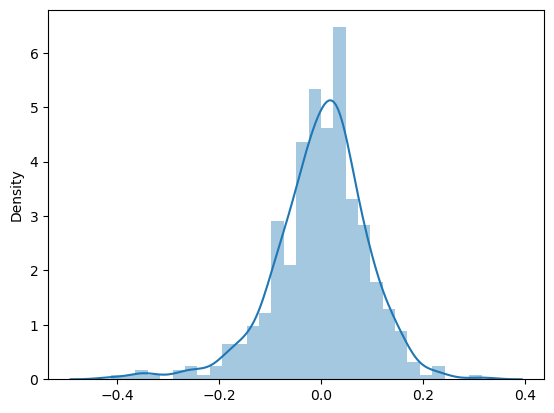

In [232]:
y_train_predict = lr_model_9.predict(X_train_sm9)
res = y_train - y_train_predict 
sns.distplot(res)
plt.show()

Normal distribution with a mean of 0

Make Inferance, Make prediction and Test 

Adding Scaling on test data 

In [233]:
#resuing numerical_columns
numerical_cols


['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [234]:

scaler = MinMaxScaler()
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Light Snow,Mist
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [235]:
y_test = df_test.pop('cnt')
X_test = df_test

In [236]:

X_test_var = X_test[x_train_model_9.columns]

X_test_sm = sm.add_constant(X_test_var)
lr_test = sm.OLS(y_test,X_test_sm)
lr_test_model = lr_test.fit()
print(lr_test_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     86.87
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.26e-68
Time:                        20:10:58   Log-Likelihood:                 183.51
No. Observations:                 219   AIC:                            -345.0
Df Residuals:                     208   BIC:                            -307.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0242      0.033      0.728      0.4

In [237]:
y_test_predict = lr_model_9.predict(X_test_sm)

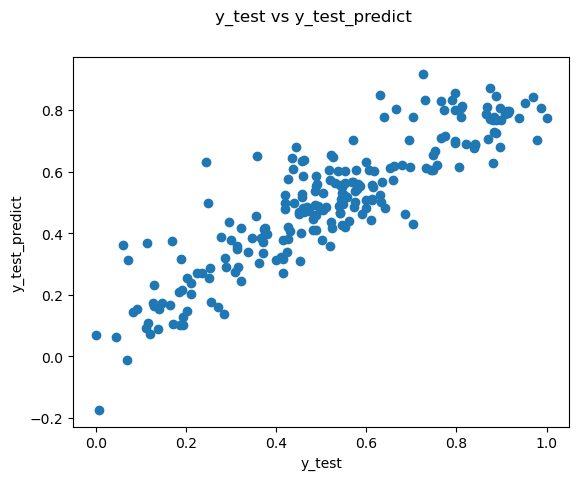

In [238]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_predict)
fig.suptitle('y_test vs y_test_predict')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_test_predict') 
plt.show()

<b>Evaluate R2 Score </b>

In [239]:
r2=r2_score(y_true = y_test,y_pred = y_test_predict) 
r2

0.7880219317877524

Adjusted_R2 = 1-((1-r2)(n-1)/n-p-1)
p = number of predictors 
n = sample size 

In [240]:
n = int(X_test_var.shape[0])
print(n)
p = int(X_test_var.shape[1])
print(p)

219
10


In [177]:
1-(1-r2)*(n-1)/(n-p-1)

0.7778306785083173

 #col               Train              Test
#R2               0.836             0.788
 #Adjusted R2      0.832             0.777

In [257]:
response_df = pd.DataFrame.from_dict({'':['R2','Adjusted R2'],'train_set':[0.836,0.832],'test_set':[0.78,0.77]})
response_df

,,train_set,test_set
0,R2,0.836,0.78
1,Adjusted R2,0.832,0.77


BoomBikes Should consider the below independent variables to understand the dependent <b>cnt </b> / increase the business

 - temp 
 - workingday  
 - windspeed  
 - yr  
 - Sat  
 - summer  
 - Mist  
 - winter  
 - Sep  
 - Light Snow